Toyota Exploratory Data Analysis
In this notebook , toyota data set has been explored to know more about data

#### Import required libraries and packages

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read a csv file as pandas DataFrame

In [94]:
df = pd.read_csv("toyota.csv")

display(df)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0
...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,50.4,1.3


#### Check for missing values, data types of the columns

In [95]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.2+ KB


None

#### Create a function to find the number of observations for unique value in a column of a DataFrame

In [96]:
def unique_val_count(data, column):
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

In [97]:
model_count = unique_val_count(df, 'model')
year_count = unique_val_count(df, 'year')
transmission_count = unique_val_count(df, 'transmission')
fuelType_count = unique_val_count(df, 'fuelType')
engineSize_count= unique_val_count(df, 'engineSize')

In [98]:
# sort the year_count DataFrame based on 'year'
year_count = year_count.sort_values(by='year')
# year_count

#### Create a function to show the number of observations for each unique value in a column using a barplot

In [99]:
def barplot(data, column_x, color, rotation, yticks):
    
    # create a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    # write a title for your plot
    plt.title("Percent of car present for each " + column_x)
    
    # write proper lebel for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotate the xticks if necessary
    plt.xticks(rotation=rotation)
    
    # provide a range for the yticks
    plt.yticks(yticks)

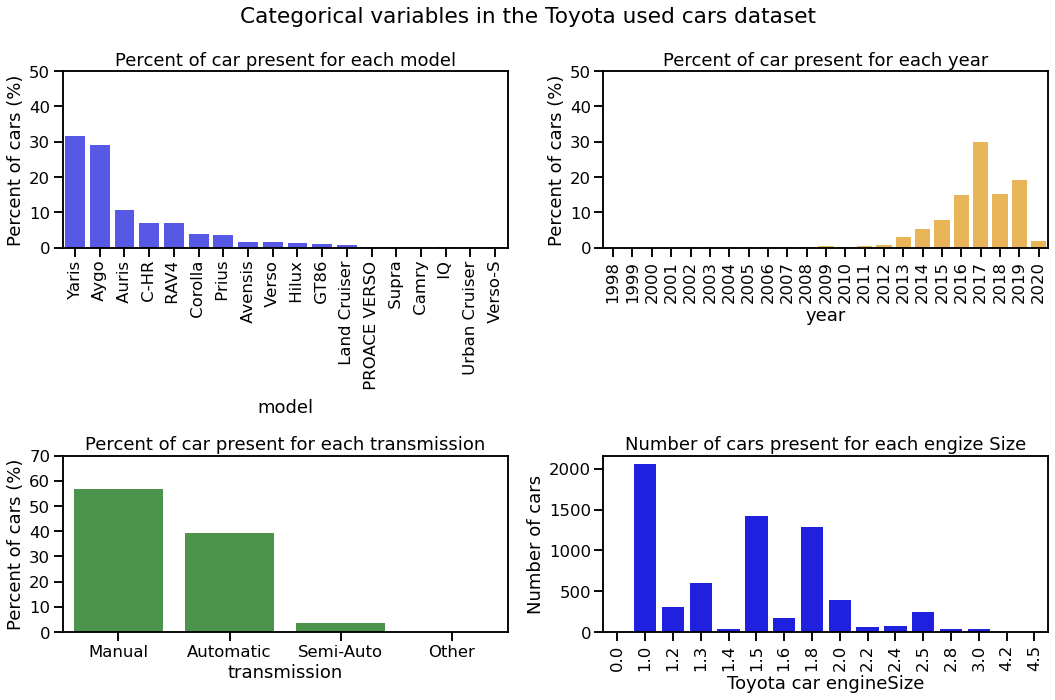

In [100]:
sns.set_context('talk')

plt.figure(figsize=(15,10))

# row 1, column 1
plt.subplot(2,2,1)
barplot(model_count, 'model', 'blue', 90, np.arange(0,51,10))

# row 1, column 2
plt.subplot(2,2,2)
barplot(year_count, 'year', 'orange', 90, np.arange(0,51,10))

# row 2, column 1
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,71,10))

# row 2, column 2
plt.subplot(2,2,4)
sns.barplot(x='engineSize', y='No_of_cars', data=engineSize_count, color='blue', alpha=1)
plt.title("Number of cars present for each engize Size")
plt.xlabel("Toyota car engineSize")
plt.ylabel("Number of cars")
plt.xticks(rotation=90)

plt.suptitle("Categorical variables in the Toyota used cars dataset")

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()